In [17]:
import xgboost as xgb
from xgboost import plot_importance
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, roc_curve, confusion_matrix,accuracy_score,precision_score,recall_score
import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()
X_features = dataset.data
y_label = dataset.target

cancer_df = pd.DataFrame(data=X_features, columns=dataset.feature_names)
cancer_df['target'] = y_label
cancer_df.head(3)





,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.2, random_state=156)
print(X_train.shape, X_test.shape)

(455, 30) (114, 30)


In [19]:
#데이터 설정
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [20]:
#하이퍼 파라미터 설정
params = {
    'max_depth':3,
    'eta':0.1,
    'objective':'binary:logistic',
    'eval_metric':'logloss',
    'early_stoppings':100,
    'gpu_id': 0,
    'tree_method':'gpu_hist',
    'predictor':'gpu_predictor',
}
num_rounds = 400

In [21]:
wlist = [(dtrain,'train'),(dtest,'eval')]
xgb_model = xgb.train(params = params, dtrain=dtrain, num_boost_round=num_rounds, evals=wlist)

[18:37:09] WARNING: ../src/learner.cc:576: 
Parameters: { "early_stoppings" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-logloss:0.61014	eval-logloss:0.61286
[1]	train-logloss:0.54163	eval-logloss:0.54664
[2]	train-logloss:0.48373	eval-logloss:0.49307
[3]	train-logloss:0.43510	eval-logloss:0.44674
[4]	train-logloss:0.39346	eval-logloss:0.40816
[5]	train-logloss:0.35564	eval-logloss:0.37402
[6]	train-logloss:0.32334	eval-logloss:0.34525
[7]	train-logloss:0.29467	eval-logloss:0.31941
[8]	train-logloss:0.26934	eval-logloss:0.29711
[9]	train-logloss:0.24746	eval-logloss:0.27642
[10]	train-logloss:0.22748	eval-logloss:0.25939
[11]	train-logloss:0.20989	eval-logloss:0.24411
[12]	train-logloss:0.19395	eval-logloss:0.23051
[13]	train-logloss:0

In [22]:
pred_probs = xgb_model.predict(dtest)
print(np.round(pred_probs[:10],3))

preds= [ 1 if x > 0.5 else 0 for x in pred_probs]

[0.916 0.003 0.958 0.166 0.993 1.    0.999 0.999 0.997 0.   ]


In [23]:
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    print(confusion)
    print('정확도: {0: .4f}, 정밀도: {1: .4f}, 재현율: {2: .4f}, F1: {3: .4f},'.format(accuracy,precision,recall,f1))

In [24]:
get_clf_eval(y_test,preds)

[[34  3]
 [ 2 75]]
정확도:  0.9561, 정밀도:  0.9615, 재현율:  0.9740, F1:  0.9677,


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

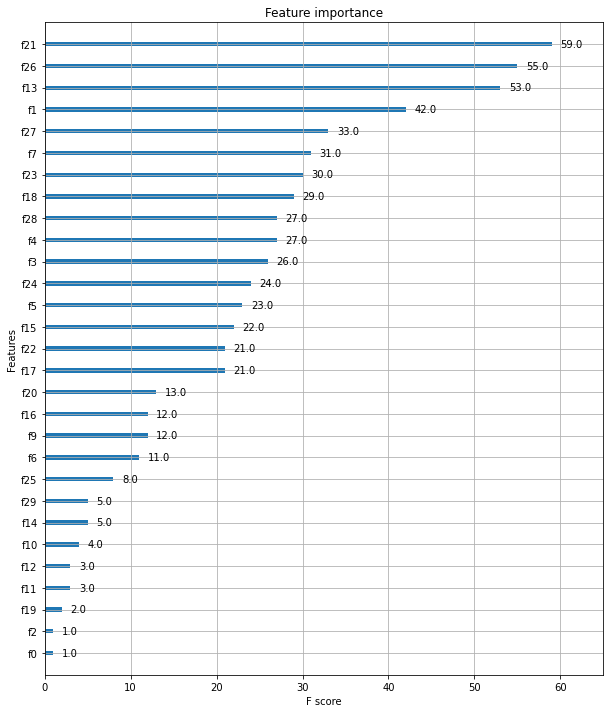

In [25]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,12))
plot_importance(xgb_model, ax=ax#)

In [ ]:
#cv도 사용가능
xgb.cv(params, dtrain,num_boost_round=10, nfold=3, stratified=False, folds=None, metrics=(), obj=None, feval= None, maximize=False, early_stopping_rounds=None, fpreproc=None, as_pandas=True, verbose_eval=None, show_stdv=True, seed=0, callbacks=None, shuffle=True)
